##  African Food Production and Supply Problem

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directory = 'data/'
os.listdir(directory)

['Africa Food Production (2004 - 2013).csv',
 'Africa Food Supply (2004 - 2013).csv']

In [3]:
images = 'output/'
os.listdir(images)

[]

In [4]:
df_prod = pd.read_csv(directory+'Africa Food Production (2004 - 2013).csv')
df_cons = pd.read_csv(directory+'Africa Food Supply (2004 - 2013).csv')

In [5]:
print("\tFood Production\n", df_prod.head(), "\n\tFood Consumption\n", df_cons.head())

	Food Production
    Country                Item  Year  Value
0  Algeria  Wheat and products  2004   2731
1  Algeria  Wheat and products  2005   2415
2  Algeria  Wheat and products  2006   2688
3  Algeria  Wheat and products  2007   2319
4  Algeria  Wheat and products  2008   1111 
	Food Consumption
    Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048


In [6]:
print("\tFood Production\n", df_prod.isnull().sum(), "\n\tFood Consumption\n", df_cons.isnull().sum())

	Food Production
 Country    0
Item       0
Year       0
Value      0
dtype: int64 
	Food Consumption
 Country    0
Year       0
Value      0
dtype: int64


In [7]:
co_df = df_cons.groupby(['Country', 'Year'])['Value'].sum().reset_index()
co_df.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [8]:
status_df = df_prod.groupby(['Country', 'Year'])['Value'].sum().reset_index()
status_df.head()

,Country,Year,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841


In [9]:
import plotly.express as px

In [10]:
fig = px.bar(status_df, x='Year', y='Value',
              color='Year',
             labels={'Year'}, height=400)
fig.show()

In [11]:
fig = px.bar(status_df, x='Country', y='Value',
              color='Year',
             labels={'Year'}, height=400)
fig.show()

In [12]:
fig = px.bar(co_df, x='Year', y='Value',
              color='Year',
             labels={'Year'}, height=400)
fig.show()

In [13]:
fig = px.bar(co_df, x='Country', y='Value',
              color='Year',
             labels={'Year'}, height=400)
fig.show()

### Trends in Food Production & Supply

In [14]:
prod_df = df_prod.groupby('Year')['Value'].mean()
prod_df = pd.DataFrame({'Year': prod_df.index, 'Production': prod_df.values})

In [15]:
prod_df.head()

,Year,Production
0,2004,286.767301
1,2005,298.986592
2,2006,310.814014
3,2007,305.215830
4,2008,318.686851


/tmp/ipykernel_54378/1764463801.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



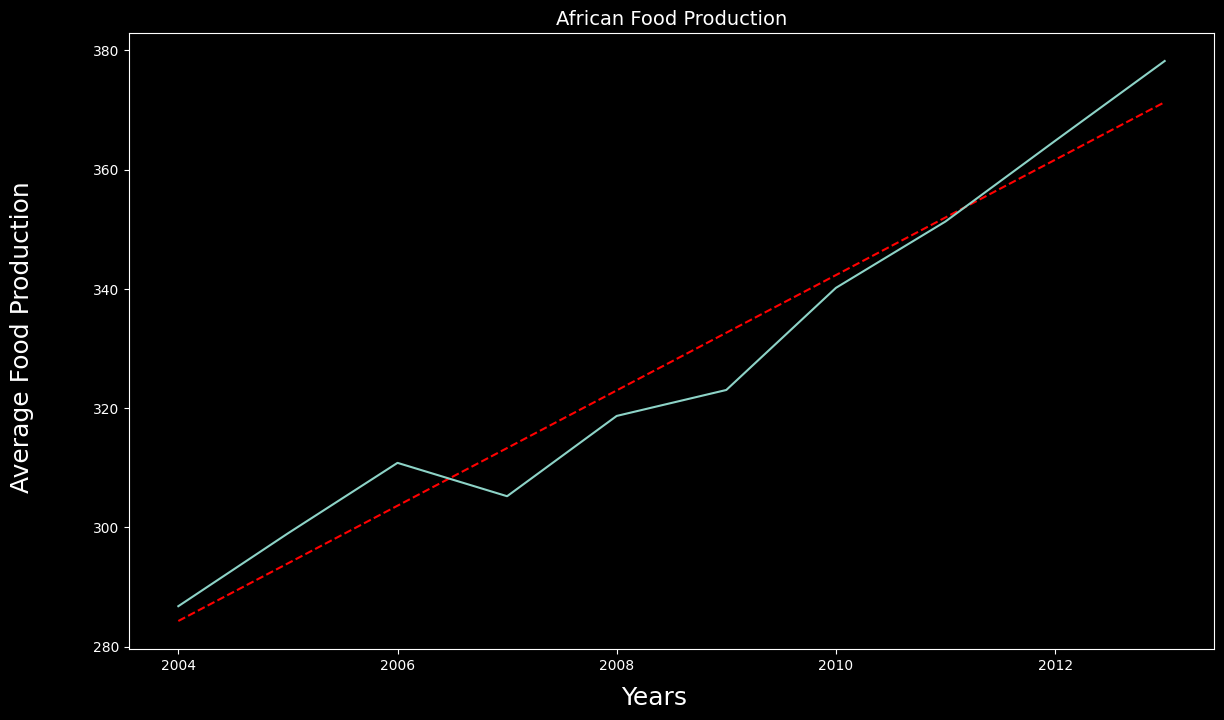

In [16]:
X = np.array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])
prod = prod_df['Production'].to_numpy()
fig, ax = plt.subplots(1, figsize=(14, 8))
z = np.polyfit(X, prod, 1)
p = np.poly1d(z)
ax.plot(X,p(X),"r--")
ax.plot(X, prod)
ax.set_title('African Food Production', fontsize=14)
fig.text(0.5, 0.04, 'Years', ha='center', fontsize=18)
fig.text(0.04, 0.5, 'Average Food Production', va='center', rotation='vertical', fontsize=18)
fig.show()

In [17]:
cons_df = df_cons.groupby('Year')['Value'].mean()
cons_df = pd.DataFrame({'Year': cons_df.index, 'Consumption': cons_df.values})
cons_df.head()

,Year,Consumption
0,2004,2394.222222
1,2005,2409.288889
2,2006,2430.800000
3,2007,2447.755556
4,2008,2460.755556


/tmp/ipykernel_54378/3366425142.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



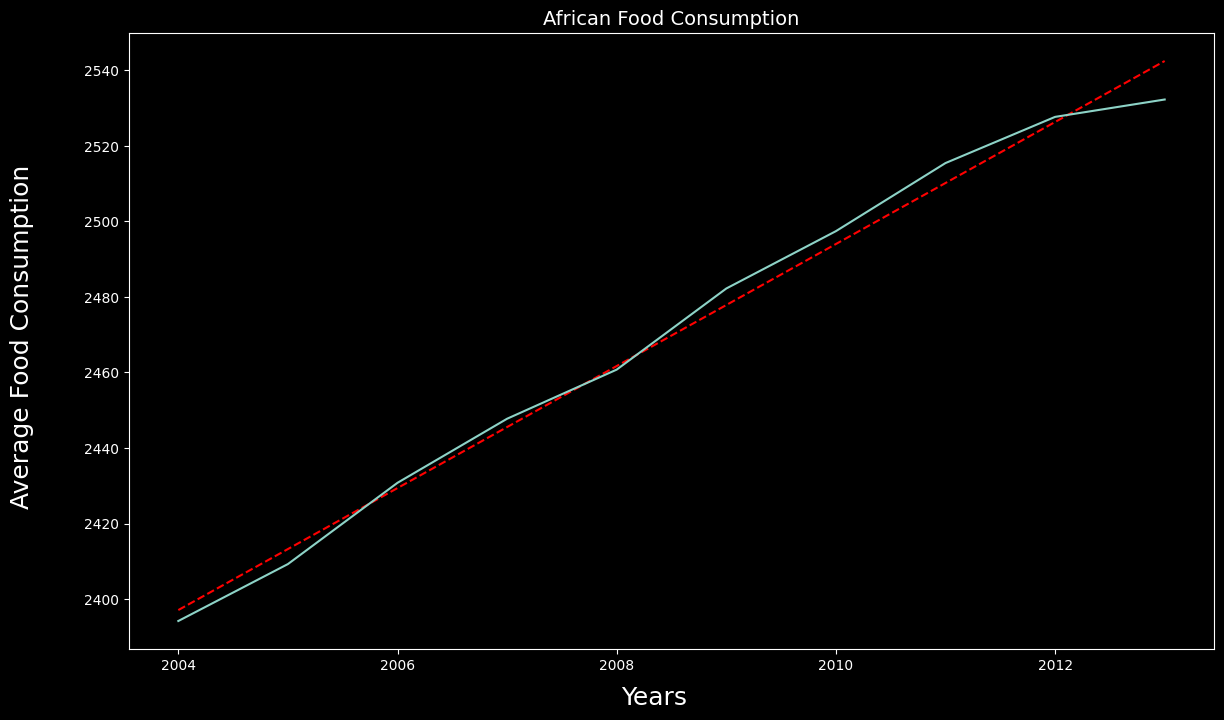

In [18]:
Y = np.array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])
cons = cons_df['Consumption'].to_numpy()
fig, ax = plt.subplots(1, figsize=(14, 8))
z = np.polyfit(Y, cons, 1)
p = np.poly1d(z)
ax.plot(Y,p(Y),"r--")
ax.plot(Y, cons)
ax.set_title('African Food Consumption', fontsize=14)
fig.text(0.5, 0.04, 'Years', ha='center', fontsize=18)
fig.text(0.04, 0.5, 'Average Food Consumption', va='center', rotation='vertical', fontsize=18)
fig.show()

### Comparison of Average Food Production and Consumption

In [19]:
comp_df = pd.merge(prod_df, cons_df, on="Year" )
comp_df.head()

,Year,Production,Consumption
0,2004,286.767301,2394.222222
1,2005,298.986592,2409.288889
2,2006,310.814014,2430.800000
3,2007,305.215830,2447.755556
4,2008,318.686851,2460.755556


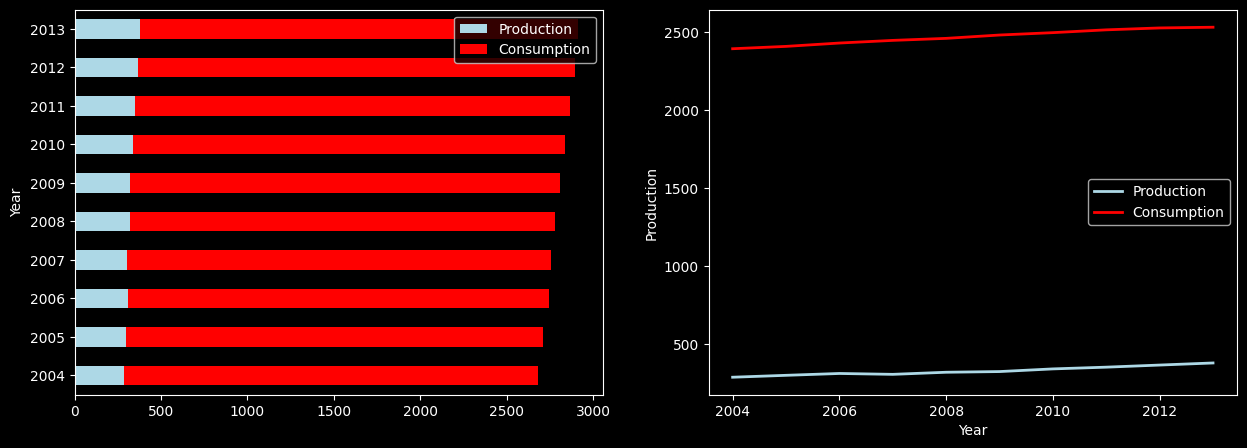

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15,5))
# ax1 = comp_df.plot(x="Year", y="Production", kind="barh")
comp_df.set_index('Year').plot(kind='barh', stacked=True, ax = ax1,color=['lightblue', 'red'])
# comp_df.plot(x="Year", y="Consumption", kind="barh", ax=ax1, color="C2")
sns.lineplot(x = 'Year', y = 'Production', data=comp_df,ax=ax2, color='lightblue', lw=2,legend='brief', label="Production")
sns.lineplot(x = 'Year', y = 'Consumption', data=comp_df,ax=ax2, color='red', lw=2,legend='brief', label="Consumption")
plt.legend()

In [21]:
item_prod= pd.DataFrame(df_prod.groupby('Item')['Value'].sum()).reset_index(inplace=False)
item_prod.head()

,Item,Value
0,"Alcohol, Non-Food",3652
1,Apples and products,21706
2,"Aquatic Animals, Others",13
3,Aquatic Plants,1378
4,Bananas,153785


In [22]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=item_prod['Value'],
            y= item_prod['Item'],
            orientation='h'))

fig.show()

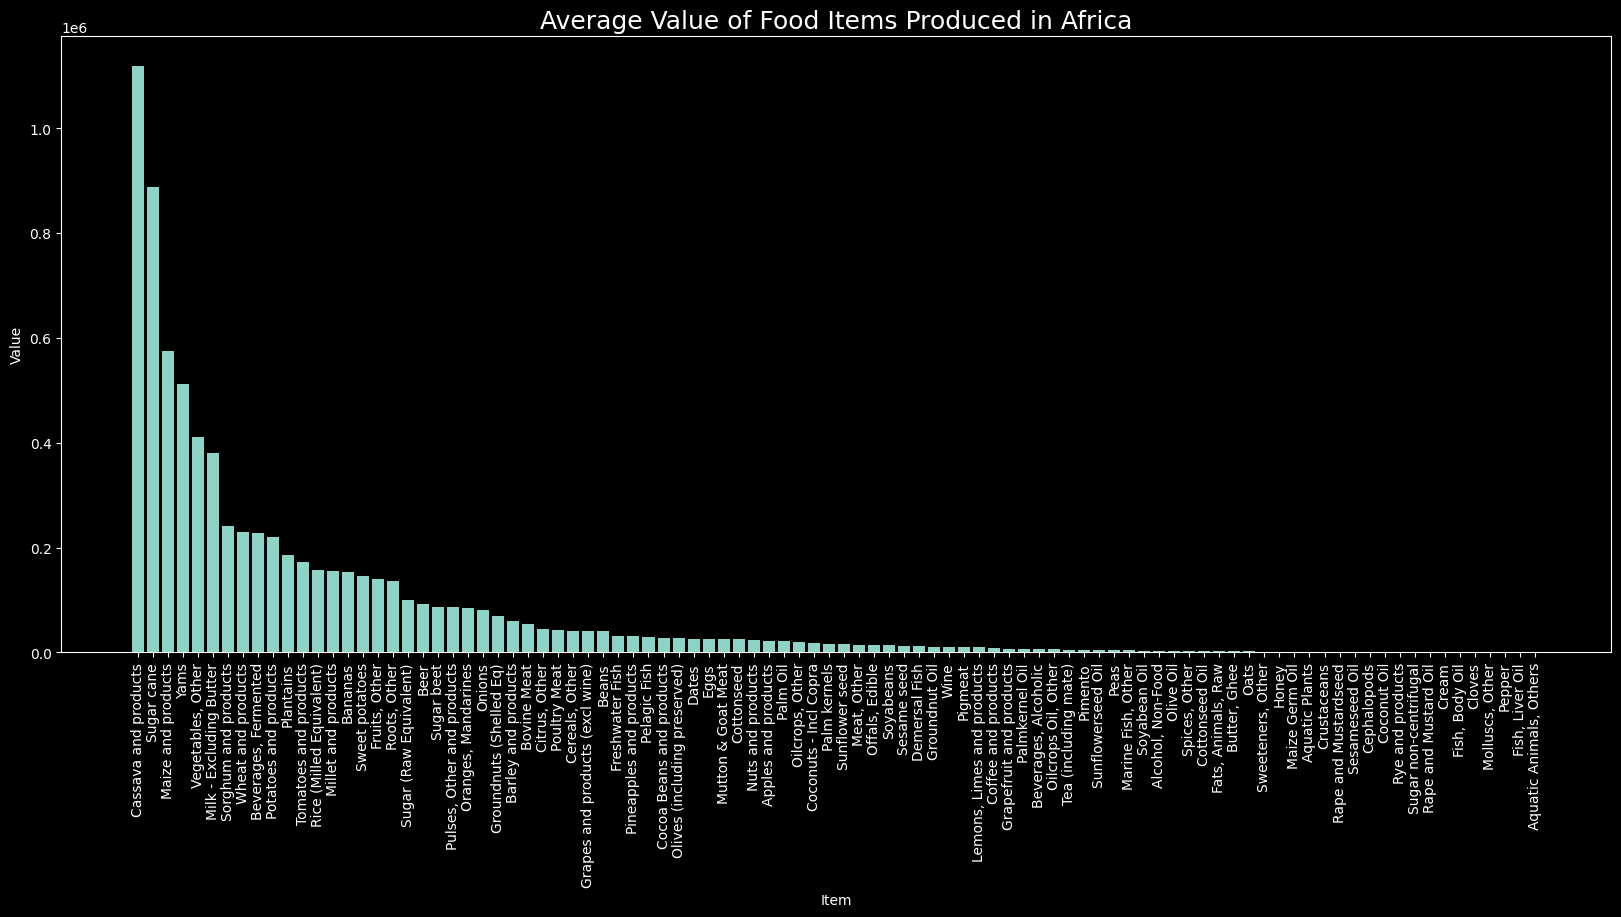

In [23]:
item_sorted= item_prod.sort_values('Value', ascending=False)
fig= plt.figure(figsize=(20,8))
# make bar plot with matplotlib
plt.bar('Item', 'Value',data=item_sorted)
plt.xlabel("Item")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("Average Value of Food Items Produced in Africa", size=18)
plt.show()

### Pattern Findings

In [24]:
production_box = px.box(
    df_prod, # dataframe input
    y="Value", # movie duration
    x="Year", # release year
    color="Year", # color by release year
    title="Box Plot for African Food Production with Year", # tilte
    points="all", # draw points as well with box plot
    width=1000 # width of the plot
)
# show plot
production_box.show()

# we can also export it as an image
# duration_box.write_image("images/output.png")

In [25]:
Consumption_box = px.box(
    df_cons, # dataframe input
    y="Value", # movie duration
    x="Year", # release year
    color="Year", # color by release year
    title="Box Plot for African Food Production with Year", # tilte
    points="all", # draw points as well with box plot
    width=1000 # width of the plot
)
# show plot
Consumption_box.show()
Consumption_box.write_image(images+ "output.png", engine="kaleido")

### Rice and Wheat Problems in Africa
---